In [16]:
#from sklearn.model_selection import train_test_split
# Importing the necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:

# Importing the necessary libraries
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer Wisconsin dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target


In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [11]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:

# Create classifiers
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    SVC(),
    RandomForestClassifier()
]



In [14]:
# Train and evaluate each classifier
results = []
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((classifier.__class__.__name__, accuracy))



/home/dell/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


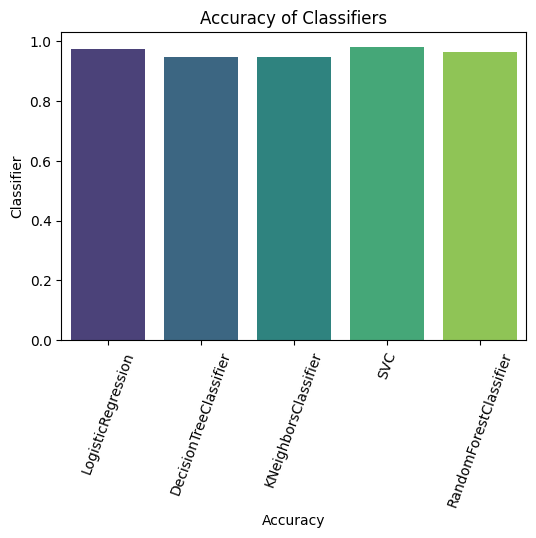

In [23]:
# Convert the results to a dataframe for visualization
results_df = pd.DataFrame(results, columns=['Classifier', 'Accuracy'])

# Plot the results using Seaborn
plt.figure(figsize=(6, 4))
sns.barplot(y='Accuracy', x='Classifier', data=results_df, palette='viridis')
plt.xlabel('Accuracy')
plt.ylabel('Classifier')
plt.title('Accuracy of Classifiers')
plt.xticks(rotation="70")
plt.show()